In [2]:
from tensorflow import keras  # 이미지가 뭉쳐있는 데이터 셓을 받아온다!
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴 # 넘파이 압축파일 딥러닝 레이어층이 길다?
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)  # 60000장 ,28 X 28 픽셀 값, 1 생략 컬러는 3 MRI는 7

(60000, 28, 28)


In [3]:
print(train_labels.shape)  # 정답지

(60000,)


In [4]:
print(test_images.shape)

(10000, 28, 28)


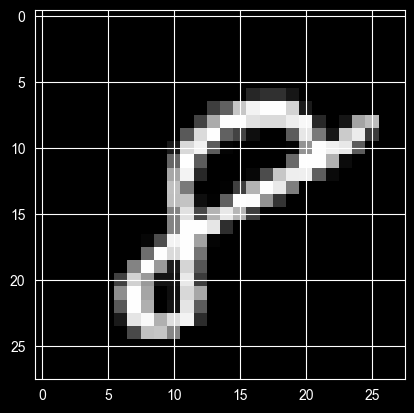

8


In [5]:
image = train_images[59999]   # 마지막 이미지 보기! 특성 28X28
plt.imshow(image, cmap='gray') # 이미지 그레이스케일러 보여줘!
plt.show()
print(train_labels[59999])

In [6]:
print(train_labels[59999])

8


In [7]:
# 훈련을 하려면 정규화(전처리 0~1사이의 값으로 만들어주기)! minmax , 255로 나누기
# 입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함
(train_images, test_images) = (train_images / 255, test_images / 255)
print(train_images[0])  # 정규화 됨.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# input (입력 노드)-28X28 중요,Flatten(평탄화)-1열로 쭉 늘려! ,
# Dense (층(뉴런) 정답은 10개다!) 중요-클래스가 여러개(3개이상)이면 softmax
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  # 28 X 28 , 입력노드
    keras.layers.Flatten(),  # 평탄화
    keras.layers.Dense(256, activation='relu'),  # 보통 2의 n제곱형태, 내맘임. 좀더 심층적으로 하려고 2개 추가!
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(56, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 출력이 10개 softmax를 쓰면 분류가 최소 3개 이상이구나!
])  # 리스트화 됨. Sequential 적층 input(젤아래) 부터 쌓임. 이걸 가지고 정답표랑 비교하겠다. 모델로 만듦
model.summary()   # 모델의 구조를 요약하여 살펴보자 # dense 부터 계산! 파라미터(층) 을 두껍게 만들었다.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         7,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,650 (943.95 KB)

 Trainable params: 241,650 (943.95 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 학습전 compile 뭉쳐준다!
model.compile(optimizer='adam',  #SGD보다 좀 더 빠르게 학습하기 위해 나온 adam 왠만하면 adam 씀. 학습에 따라 러닝레이트가 바뀜.
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # 정답표 확인 희박하다.  softmax와 찰떡이다.      , 화면에 정확도를 표시하겠다.
        # 정답표는 one hot encoding 이 좋다 근데 0이 많으니깐 sparse_categorical_crossentropy 0이 희박하다!

In [10]:
model.fit(train_images, train_labels, epochs=10)  # 10번 반목하라! # 마지막이 정확도!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9333 - loss: 0.2198
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9709 - loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9799 - loss: 0.0655
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9843 - loss: 0.0502
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0397
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9884 - loss: 0.0363
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9926 - loss: 0.0241
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0219
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9938 - loss: 0.0207


In [11]:
# 훈련 끝 테스트 해보겠다!
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # verbose=2 화면 출력정도 2는 다 보여줘라!

313/313 - 1s - 3ms/step - accuracy: 0.9787 - loss: 0.0859


In [12]:
# 학습이 잘 되면 저장 나중에 학습없이 이거 불러오면 됨.
model.save("my_second_DNN_model.keras")

In [13]:
# 불러오기
load_model = keras.models.load_model("my_second_DNN_model.keras")

In [14]:
load_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         7,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,952 (2.77 MB)

 Trainable params: 241,650 (943.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,302 (1.84 MB)

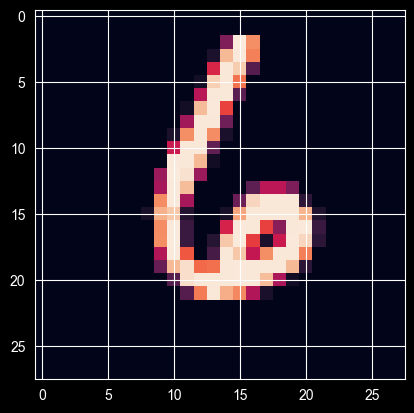

In [15]:
# 불러온 모델로 헤보자!
randIdx = np.random.randint(0, 6000)  # 6000개의 테스트 이미지 중 하나를 선택
rand_test_image = test_images[randIdx]   # 저장
plt.imshow(test_images[randIdx])
plt.show()

In [ ]:
predict_image = model.predict(rand_test_image[np.newaxis, :, :])  # 예측하기! 차원을 바꿔야함. np.newaxis, :, : 타입을 맞추기위해

In [ ]:
print(predict_image)

In [ ]:
print(predict_image.argmax())  # 가장 큰 인덱스 값

In [20]:
import cv2   # opencv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import time

# 학습된 파일 불러오기!
load_model = keras.models.load_model(r"C:\Code\PythonProject\my_second_DNN_model.keras")

secret_password = [2, 5, 8, 0]  # 정답 비밀번호
captured_nums = []  #내가 캡처해서 담을 번호 리스트

cap = cv2.VideoCapture(0)
if not cap.isOpened():  #만약 열려있지 않다면
    print("웹캠을 열 수 없습니다.")
    exit()

result_text = "    PASSWORD"   # 화면에 표시할 메시지
text_color = (255,255,255)   # 기본 흰색
is_finished = False  # 끝났는가? = 아니

while True:
    ret, frame = cap.read()  # 웹캠이 계속 켜져있는지 확인용!
    if not ret:  # 못 읽어오면 나가라
        print("프레임을 가져 올 수 없습니다.")
        break
    flip_frame = cv2.flip(frame,1)   # 프레임을 반전시켜라! 1은 좌우반전, 0은 상하반전
    height, width, _ =frame.shape  # 가운데 찾기
#  높이, 폭   컬러 자리 필요 없음 (컬러 필요없으니깐 _ 표시)
    center_x, center_y = width // 2, height // 2  # 가운데 맞춰줌
    #ROI 영역 설정
    roi = flip_frame[center_y - 100:center_y +100,center_x - 100:center_x +100]   #roi 공간 만들기 200X200 크기의 관심영역
    cv2.rectangle(flip_frame, (center_x - 100, center_y - 100),(center_x + 100, center_y + 100)
                  ,(0,0,255), 1) # 빨간색 렉탱글이 정가운데 찍힘 이건 사람용 안내선 실제 사용되는건 roi영역

    # 화면에 텍스트 그리기!
    # 현재까지 입력된 숫자 리스트 출력
    cv2.putText(flip_frame,f"Captured: {captured_nums}",(20,40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),4)
      # 화면에 보여지는 프레임,  실제 화면에 나오는 텍스트    ,  위치    ,  글꼴                 ,크기, 노랑   ,  굵기
    # 상태 메시지 (정답/오답/안내문) 출력
    cv2.putText(flip_frame, result_text, (center_x - 150, center_y + 150), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 4)
                                          # 위치
    cv2.imshow("Webcam", flip_frame)  # 화면에 글자 보여준다!
    # 화면 갭쳐용 키캆 받기
    key = cv2.waitKey(1) & 0xFF  # 키를 눌렀는가?
    if (key == ord('c') or key == ord('C')) and not is_finished:   # 눌른키값이 c나 C 면서 캡쳐 아직 끝나지 않았다면, 캡쳐!
        #전처리
        gray_image = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # BGR2GRAY 로 바꿔줌 이진화 컬러를 흑백으로 바꿔줌
                                                            # 숫자인식에 색은 필요없음. 색은 오히려 노이즈
        gray_image = np.flip(gray_image,1) # 반전 시켜서 넣어줌 # 만약 정확도가 떨어진다면 삭제!

        gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),3)  #가우시안 블러 처리 가운데는 강하게 주변은 부드럽게
                                                    # 주변 5X5 =25 칸의 평균으로 노이즈 줄임, 윤곽도 흐려짐!
        # 2진화 (전처리의 핵심) 이진화를 통해 기준값을 스스로 정하며 숫자는 흰색(255) 배경은 검정(0)
        _, otsu_thread = cv2.threshold(gaussian_blur,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 전처리 (모핑  - Morph) 모든 픽셀을 하나씩 주변을 훑으면서 본다. # 침식 생략 오히려 정확도가 떨어짐!
        kernel = np.ones((5,5),np.uint8)  # 각 픽셀마다 5x5 의 주변을 본다.
        #검사범위    주변 5X5 검사
        erosion = cv2.erode(otsu_thread,kernel,iterations=3)  # 많이 반복할 수록 굵어짐. 흰색이 깍이면서 검은색 숫자가 굵게 보이니깐

        # 배경 노이즈가 심하거나 숫자가 너무 굵게 찍혔을 때 사용하면 좋다!
        final_img = cv2.bitwise_not(erosion)

        # 이미지 반전
        #final_img = cv2.bitwise_not(otsu_thread)    # 반전 검은 배경에 흰색 숫자로 만들어줌
        test_img = cv2.resize(final_img, (28, 28))  # 사이즈 맞추어주기
        test_img = test_img / 255.0  # 정규화 0~1

        # 3. 예측하기
        predict_image = load_model.predict(test_img[np.newaxis, :, :], verbose = 0) # 차원 맞추기 (28,28) ->(1,28,28)로 만들기!
                                 # 28X28(2D) 배치단위 추가 입력규격 맞추기 # 0 아무것도 안보여줌, 1 진행바+log, 2 간단한 log
        # print(predict_image)
        predicted_num = predict_image.argmax()  # 가장 확률이 높은 인덱스 (숫자)
        accuracy = np.max(predict_image) * 100    # 가장 높은 확률값 (0.0 ~ 1.0)
        # 결과 저장 및 출력
        captured_nums.append(int(predicted_num))  # 캡쳐 숫자 정수로 바꾸고 리스트에 순서대로 저장
        print(f"[{len(captured_nums)}번 숫자] 분석 결과: {predicted_num} (정확도: {accuracy:.2f}%)")

        # 찍힌 이미지 확인용
        cv2.imshow("IMAGE_FOR_TEST6.png", final_img)
        cv2.imwrite("IMAGE_FOR_TEST6.png", final_img)


        # 4개를 다 찍었을 때 판독 로직
        if len(captured_nums) == 4:
            is_finished = True # 이제 캡처 모드 종료
            if captured_nums == secret_password:
                result_text = "     Welcome!"
                text_color = (255, 0, 0) # 파란색
            else:
                result_text = "     GET OUT!"
                text_color = (0, 0, 255) # 빨간색

    elif key == 27: # ESC 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()